Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [105]:
def wrangle(filepath):
    df = pd.read_csv(filepath, index_col='created', parse_dates = ['created'])
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    df.dropna(inplace = True)
    df['total_room'] = df['bathrooms'] + df['bedrooms']
    df.loc[(df['cats_allowed'] == 1) & (df['dogs_allowed'] == 1), 'allow_cat_and_dog'] = 1
    df.loc[(df['cats_allowed'] == 0) & (df['dogs_allowed'] == 0), 'allow_cat_and_dog'] = 0

    df.loc[(df['cats_allowed'] == df['dogs_allowed'] ), 'allow_cat_or_dog'] = 0
    df.loc[(df['cats_allowed'] != df['dogs_allowed'] ), 'allow_cat_or_dog'] = 1
   
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [106]:
import pandas as pd
import numpy as np

df = wrangle(filepath)
print(df.shape)
df.head()

(47260, 36)


,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,total_room,allow_cat_and_dog,allow_cat_or_dog
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0.0,0.0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,0.0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0.0,0.0


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [ ]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.

In [9]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000,48817.000000
mean,1.201794,1.537149,40.750760,-73.972760,3579.585247,0.524838,0.478276,0.478276,0.447631,0.424852,0.415081,0.367085,0.052769,0.268452,0.185653,0.175902,0.132761,0.138394,0.102833,0.087203,0.060471,0.055206,0.051908,0.046193,0.043305,0.042711,0.039331,0.027224,0.026241
std,0.470711,1.106087,0.038954,0.028883,1762.430772,0.499388,0.499533,0.499533,0.497255,0.494326,0.492741,0.482015,0.223573,0.443158,0.388830,0.380741,0.339320,0.345317,0.303744,0.282136,0.238359,0.228385,0.221844,0.209905,0.203544,0.202206,0.194382,0.162738,0.159852
min,0.000000,0.000000,40.575700,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47260 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             47260 non-null  float64
 1   bedrooms              47260 non-null  int64  
 2   description           47260 non-null  object 
 3   display_address       47260 non-null  object 
 4   latitude              47260 non-null  float64
 5   longitude             47260 non-null  float64
 6   price                 47260 non-null  int64  
 7   street_address        47260 non-null  object 
 8   interest_level        47260 non-null  object 
 9   elevator              47260 non-null  int64  
 10  cats_allowed          47260 non-null  int64  
 11  hardwood_floors       47260 non-null  int64  
 12  dogs_allowed          47260 non-null  int64  
 13  doorman               47260 non-null  int64  
 14  dishwasher            47260 non-nul

In [19]:
df.describe(exclude='number')

,description,display_address,street_address,interest_level
count,47392,48684,48807,48817
unique,37853,8674,15135,3
top,,Broadway,3333 Broadway,low
freq,1627,435,174,33946


In [52]:
len(df['description'])

47260

In [23]:
df['description'].head()

created
2016-06-24 07:54:24    A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
2016-06-12 12:19:27                                                     
2016-04-17 03:26:41    Top Top West Village location, beautiful Pre-w...
2016-04-18 02:22:02    Building Amenities - Garage - Garden - fitness...
2016-04-28 01:32:41    Beautifully renovated 3 bedroom flex 4 bedroom...
Name: description, dtype: object

In [10]:
df['dogs_allowed'].value_counts()

0    26965
1    21852
Name: dogs_allowed, dtype: int64

let us find create a new column that checks if a house allows cat and dog at the same time, or if they allow cat or do

In [95]:
#'allow_cat_and_dog'
df.loc[(df['cats_allowed'] == 1) & (df['dogs_allowed'] == 1), 'allow_cat_and_dog'] = 1
df.loc[(df['cats_allowed'] == 0) & (df['dogs_allowed'] == 0), 'allow_cat_and_dog'] = 0

df.loc[(df['cats_allowed'] == df['dogs_allowed'] ), 'allow_cat_or_dog'] = 0
df.loc[(df['cats_allowed'] != df['dogs_allowed'] ), 'allow_cat_or_dog'] = 1


In [98]:
df[['cats_allowed', 'dogs_allowed', 'allow_cat_and_dog', 'allow_cat_or_dog']]

In [125]:
df['allow_cat_or_dog'].value_counts()

0.0    45711
1.0     1549
Name: allow_cat_or_dog, dtype: int64

In [126]:
df['cats_allowed'].value_counts()

0    24817
1    22443
Name: cats_allowed, dtype: int64

In [127]:
df['dogs_allowed'].value_counts()

0    26306
1    20954
Name: dogs_allowed, dtype: int64

In [124]:
df['allow_cat_and_dog'].value_counts()

0.0    24787
1.0    20924
Name: allow_cat_and_dog, dtype: int64

In [119]:
df['total_room']


created
2016-06-24 07:54:24    4.5
2016-06-12 12:19:27    3.0
2016-04-17 03:26:41    2.0
2016-04-18 02:22:02    2.0
2016-04-28 01:32:41    5.0
                      ... 
2016-06-02 05:41:05    3.0
2016-04-04 18:22:34    2.0
2016-04-16 02:13:40    2.0
2016-04-08 02:13:33    1.0
2016-04-12 02:48:07    3.0
Name: total_room, Length: 47260, dtype: float64

Visualization

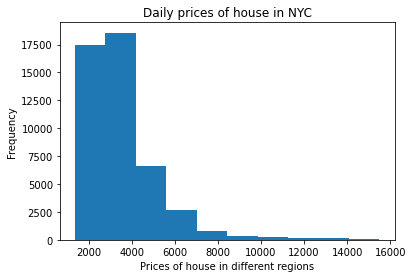

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

# Plot a histogram of Parasleep from the Sleep DataFrame
ax.hist(df['price'])

# Specify the axis labels and plot title
ax.set_xlabel('Prices of house in different regions') 
ax.set_ylabel('Frequency') 
ax.set_title('Daily prices of house in NYC') 

plt.show()

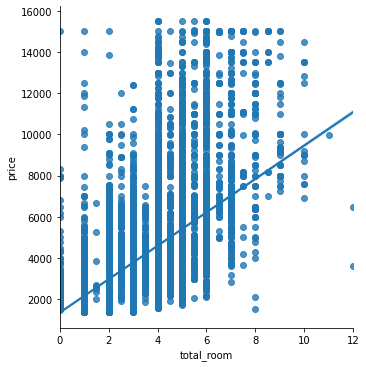

In [123]:
sns.lmplot(x = 'total_room', y = 'price', data = df )

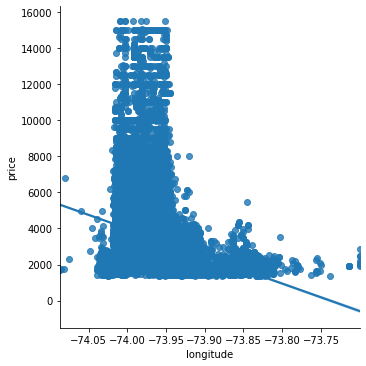

In [137]:
sns.lmplot(x='longitude', y = 'price', data = df )

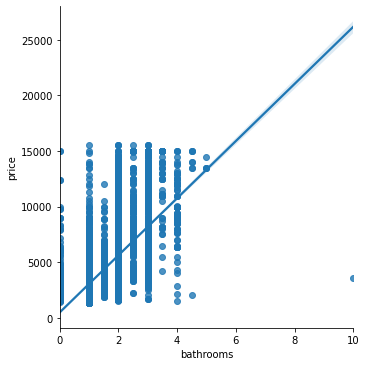

In [140]:
sns.lmplot(x='bathrooms', y = 'price', data = df )

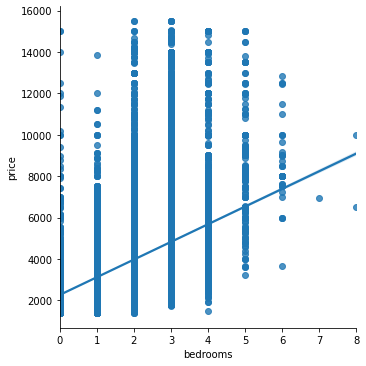

In [142]:
sns.lmplot(x='bedrooms', y = 'price', data = df )

In [145]:
from scipy import stats as st
r, p_val = st.pearsonr(df[''], df['price'])
print(r, p_val)

-0.24995543741903054 0.0


# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [149]:
X = df[['total_room', 'bathrooms', 'bedrooms']]
y = df['price']

In [147]:
print(X.shape)
print(y.shape)

(47260, 3)
(47260,)


**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [154]:
cutoff = '2016-06-24 07:54:24'
mask = X.index < '2016-06-24 07:54:24'
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]
y_test.shape

(2582,)

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [155]:
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE', mean_absolute_error(y_train,y_pred ))

Baseline MAE 1202.1266289358853


In [156]:
baseline_mae = mean_absolute_error(y_train,y_pred )
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1202.1266289358853


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [172]:
# Step 1: Import predictor class

from sklearn.linear_model import LinearRegression
# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train);

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [162]:
training_mae =  mean_absolute_error(y_train, model.predict(X_train))
test_mae =  mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 819.1302156807536
Test MAE: 817.0758551253145


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [165]:
from sklearn.metrics import mean_squared_error
training_r2 = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_r2 = mean_squared_error(y_test, model.predict(X_test), squared =False)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 1228.8962523306147
Test MAE: 1213.710050049904


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [173]:
f'{model.intercept_} + {model.coef_[0]} * total_room + {model.coef_[1]} *bathroom' + {model.coeff_[3]} )'

SyntaxError: ignored